In [140]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle


number of estimated clusters : 12


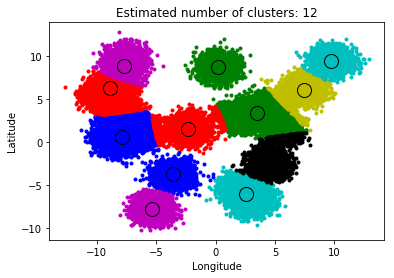

In [141]:
# Generate sample data
X, _ = make_blobs(n_samples=50000, centers=20, cluster_std=0.8)

# Adjusts clustering sensitivity
bandwidth = estimate_bandwidth(X, quantile=0.05, n_samples=500)
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()